Building a Linear Regression Moodle

y = wx + b

In [1]:
# importing libraries
import numpy as np

**Linear** **Regression**

In [2]:
class Linear_Regression:
# initiating the parameters (learning rate, number of iterations)
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, x, y):
    # number of training exampls and the number of features

    self.m, self.n = x.shape # number of rows and columns

    # initiate weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.x = x
    self.y = y

    # implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    y_pred = self.predict(self.x)

    # calculate the gradient
    dw = -(2*(self.x.T).dot(self.y - y_pred))/self.m
    db = -(2*np.sum(self.y - y_pred))/self.m

    # Update the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self, x):

    return x.dot(self.w) + self.b

using linear regression model for prediction

In [3]:
# importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data pre_processing

In [5]:
# loading the data from csv file to pd data fram
salary_data = pd.read_csv("/content/salary_data.csv")

In [6]:
# printing the first 5 columns of the df
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
# last 5 rows
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [8]:
# print the number of rows and columns of the df
salary_data.shape

(30, 2)

In [9]:
# check for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [10]:
# split the feature and target
x = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values

In [11]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [12]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [13]:
#split the data by training and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 2)


Training the linear regression model

In [21]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 100)

In [22]:
model.fit(x_train, y_train)

In [23]:
# printing the parameter values (wights & bias)

print("weight = ", model.w[0])
print("bias = ", model.b)

weight =  10941.258155090314
bias =  13499.045037502532


In [24]:
# predict the salary value for the test data
test_data_prediction = model.predict(x_test)

In [25]:
print(test_data_prediction)

[ 27722.68063912  25534.4290081   62734.70673541  53981.70021134
  91181.97793864  79146.59396804 103217.36190924  46322.81950277
  35381.56134768  87899.60049212]


Visualizing the predicted values and the actual values

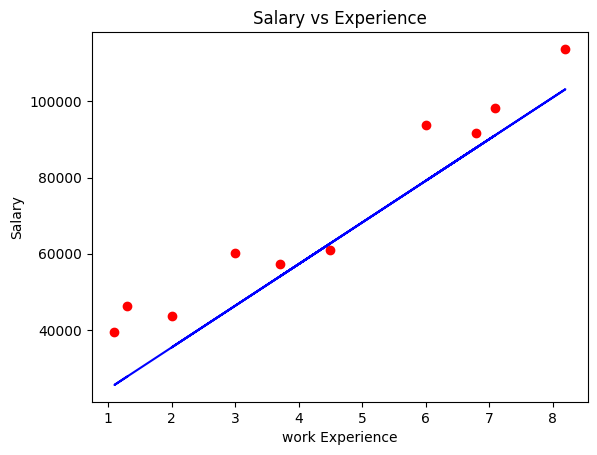

In [26]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, test_data_prediction, color = "blue")
plt.xlabel("work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()